Train samples: 189
Validation samples: 21
Test samples: 42
Label distribution in training data:
Deceptive: 545
Truthful: 11480

Label distribution in validation data:
Deceptive: 50
Truthful: 1233

Label distribution in test data:
Deceptive: 207
Truthful: 2268

Balanced training data:
Deceptive: 545
Truthful: 545

Balanced Train padded shape: (1090, 15)
Validation padded shape: (1283, 15)
Test padded shape: (2475, 15)
Original Train padded shape: (12025, 15)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 15)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 15, 128)        │      1,280,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 15, 128)        │         98,816 │ embedding[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 15, 128)        │              0 │ bidirectional[0][0],   │
│                           │                        │                │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 1920)           │              0 │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │        122,944 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             65 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,501,825 (5.73 MB)

 Trainable params: 1,501,825 (5.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5628 - f1_score_metric: 0.6072 - loss: 0.6882 - val_accuracy: 0.3305 - val_f1_score_metric: 0.4635 - val_loss: 0.7577
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5845 - f1_score_metric: 0.3987 - loss: 0.6725 - val_accuracy: 0.7436 - val_f1_score_metric: 0.8416 - val_loss: 0.5796
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7848 - f1_score_metric: 0.5121 - loss: 0.4839 - val_accuracy: 0.6602 - val_f1_score_metric: 0.7835 - val_loss: 0.8508
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8951 - f1_score_metric: 0.5138 - loss: 0.2474 - val_accuracy: 0.7685 - val_f1_score_metric: 0.8582 - val_loss: 0.6043
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7349 - f1_score_metric: 0.8199 - loss: 0.5875

Test accuracy: 0.7103
Test F1 score: 0.7955
Test loss: 0.6078
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Actual Lies - Precision: 0.9394
Actual Lies - Recall: 0.7310
Actua

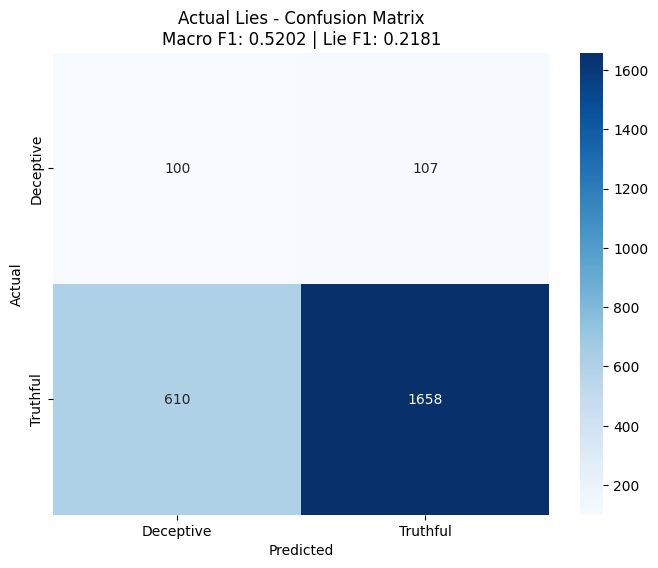

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Suspected Lies - Precision: 0.9399
Suspected Lies - Recall: 0.7182
Suspected Lies - F1 Score: 0.8142
Suspected Lies - Macro F1: 0.4745
Suspected Lies - Lie F1: 0.1349


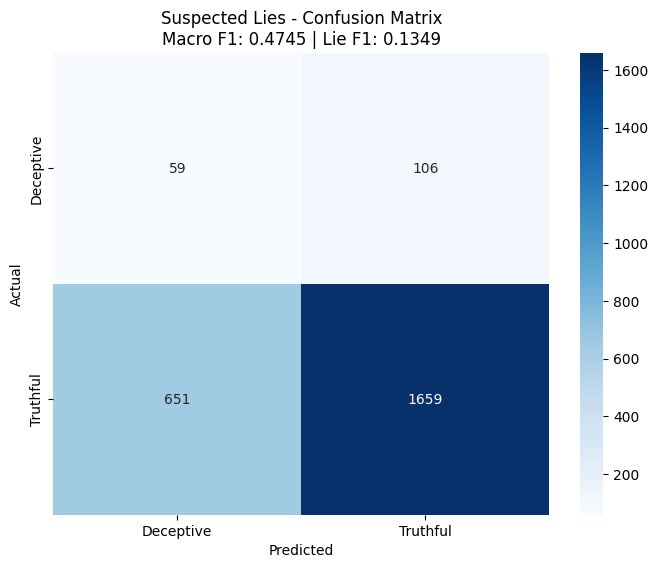

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, Attention, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.utils import resample
import re
import tensorflow as tf
import string

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
data_dir = '/kaggle/input/diplomacy/transformers/default/1/Dataset/data'

# Load train, validation, and test datasets
def load_dataset(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

train_data = load_dataset(os.path.join(data_dir, 'train.jsonl'))
validation_data = load_dataset(os.path.join(data_dir, 'validation.jsonl'))
test_data = load_dataset(os.path.join(data_dir, 'test.jsonl'))

print(f"Train samples: {len(train_data)}")
print(f"Validation samples: {len(validation_data)}")
print(f"Test samples: {len(test_data)}")

# Preprocess the data for modeling
def preprocess_data(data):
    texts = []
    labels = []
    for sample in data:
        messages = sample['messages']
        sender_labels = sample['sender_labels']
        receiver_labels = sample['receiver_labels']
        
        for i in range(len(messages)):
            if receiver_labels[i] != "NOANNOTATION":
                texts.append(messages[i])
                labels.append(0 if sender_labels[i] == False else 1)  # 0 for deceptive, 1 for truthful
    return texts, labels

# Process all datasets
train_texts, train_labels = preprocess_data(train_data)
val_texts, val_labels = preprocess_data(validation_data)
test_texts, test_labels = preprocess_data(test_data)

# Label distribution
print("Label distribution in training data:")
print(f"Deceptive: {sum(1 for l in train_labels if l == 0)}")
print(f"Truthful: {sum(1 for l in train_labels if l == 1)}")

print("\nLabel distribution in validation data:")
print(f"Deceptive: {sum(1 for l in val_labels if l == 0)}")
print(f"Truthful: {sum(1 for l in val_labels if l == 1)}")

print("\nLabel distribution in test data:")
print(f"Deceptive: {sum(1 for l in test_labels if l == 0)}")
print(f"Truthful: {sum(1 for l in test_labels if l == 1)}")

# Create balanced dataset
def create_balanced_dataset(texts, labels):
    df = pd.DataFrame({'text': texts, 'label': labels})
    
    # Separate majority and minority classes
    df_majority = df[df.label == 1]
    df_minority = df[df.label == 0]
    
    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                       replace=False, 
                                       n_samples=len(df_minority), 
                                       random_state=42)
    
    # Combine minority class with downsampled majority class
    df_balanced = pd.concat([df_minority, df_majority_downsampled])
    
    # Shuffle the dataframe
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return df_balanced['text'].tolist(), df_balanced['label'].tolist()

# Create balanced training dataset
balanced_train_texts, balanced_train_labels = create_balanced_dataset(train_texts, train_labels)

print("\nBalanced training data:")
print(f"Deceptive: {sum(1 for l in balanced_train_labels if l == 0)}")
print(f"Truthful: {sum(1 for l in balanced_train_labels if l == 1)}")

# Text preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Clean all text data
balanced_train_texts_clean = [clean_text(text) for text in balanced_train_texts]
val_texts_clean = [clean_text(text) for text in val_texts]
test_texts_clean = [clean_text(text) for text in test_texts]

# Tokenization and padding with reduced sequence length
max_vocab_size = 10000
max_sequence_length = 15  # Reduced from 100 to 15

# Initialize tokenizer
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(balanced_train_texts_clean)

# Convert texts to sequences
balanced_train_sequences = tokenizer.texts_to_sequences(balanced_train_texts_clean)
val_sequences = tokenizer.texts_to_sequences(val_texts_clean)
test_sequences = tokenizer.texts_to_sequences(test_texts_clean)

# Pad sequences to uniform length
balanced_train_padded = pad_sequences(balanced_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Also process the original train data for fine-tuning
train_texts_clean = [clean_text(text) for text in train_texts]
train_sequences = tokenizer.texts_to_sequences(train_texts_clean)
train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Verify the shape
print("\nBalanced Train padded shape:", balanced_train_padded.shape)
print("Validation padded shape:", val_padded.shape)
print("Test padded shape:", test_padded.shape)
print("Original Train padded shape:", train_padded.shape)

# Define the Bi-LSTM with Attention model
def create_bi_lstm_attention_model(max_vocab_size, embedding_dim, lstm_units, max_sequence_length):
    inputs = Input(shape=(max_sequence_length,))
    
    # Embedding layer
    embedding = Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length)(inputs)
    
    # Bidirectional LSTM
    lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=True))(embedding)
    
    # Attention mechanism
    attention = tf.keras.layers.Attention()([lstm_layer, lstm_layer])
    attention = Flatten()(attention)
    
    # Classification layers
    dense = Dense(64, activation='relu')(attention)
    dropout = Dropout(0.5)(dense)
    outputs = Dense(1, activation='sigmoid')(dropout)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

# Model parameters
embedding_dim = 128
lstm_units = 64

# Create the model
model = create_bi_lstm_attention_model(max_vocab_size, embedding_dim, lstm_units, max_sequence_length)

# Custom F1 Score metric
def f1_score_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float32)
    
    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))
    
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1

# Compile the model with custom F1 score metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score_metric])

model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    '/kaggle/working/model_epoch_{epoch:02d}.keras',
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=False,
    mode='auto'
)
best_model_checkpoint = ModelCheckpoint(
    '/kaggle/working/best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='auto'
)

# Train the model on balanced dataset
history_balanced = model.fit(
    balanced_train_padded, 
    np.array(balanced_train_labels, dtype=np.float32),
    batch_size=32,
    epochs=10,
    validation_data=(val_padded, np.array(val_labels, dtype=np.float32)),
    callbacks=[early_stopping, model_checkpoint, best_model_checkpoint]
)

# Fine-tune on complete dataset
# Load the best model from balanced training
best_model = load_model('/kaggle/working/best_model.keras', custom_objects={'f1_score_metric': f1_score_metric})

# Recompile the model
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score_metric])

# # Continue training on the complete dataset
# history_fine_tune = best_model.fit(
#     train_padded, 
#     np.array(train_labels, dtype=np.float32),
#     batch_size=32,
#     epochs=5,
#     validation_data=(val_padded, np.array(val_labels, dtype=np.float32)),
#     callbacks=[early_stopping]
# )

# Evaluate on test data
test_loss, test_accuracy, test_f1 = best_model.evaluate(test_padded, np.array(test_labels, dtype=np.float32))
print(f'\nTest accuracy: {test_accuracy:.4f}')
print(f'Test F1 score: {test_f1:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Generate predictions
test_predictions = best_model.predict(test_padded)
test_predictions_binary = (test_predictions > 0.5).astype(int)

# Calculate evaluation metrics for actual lies
precision_actual = precision_score(test_labels, test_predictions_binary)
recall_actual = recall_score(test_labels, test_predictions_binary)
f1_actual = f1_score(test_labels, test_predictions_binary)
f1_macro_actual = f1_score(test_labels, test_predictions_binary, average='macro')
f1_lie_actual = f1_score(test_labels, test_predictions_binary, average='binary', pos_label=0)  # Lie F1 (deceptive class)

print(f'\nActual Lies - Precision: {precision_actual:.4f}')
print(f'Actual Lies - Recall: {recall_actual:.4f}')
print(f'Actual Lies - F1 Score: {f1_actual:.4f}')
print(f'Actual Lies - Macro F1: {f1_macro_actual:.4f}')
print(f'Actual Lies - Lie F1: {f1_lie_actual:.4f}')

# Create confusion matrix for actual lies
conf_matrix_actual = confusion_matrix(test_labels, test_predictions_binary)

# Plot confusion matrix for actual lies
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_actual, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Deceptive', 'Truthful'], 
            yticklabels=['Deceptive', 'Truthful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Actual Lies - Confusion Matrix\nMacro F1: {f1_macro_actual:.4f} | Lie F1: {f1_lie_actual:.4f}')
plt.show()

# Evaluate for suspected lies (using receiver_labels)
def preprocess_suspected_data(data):
    texts = []
    labels = []
    for sample in data:
        messages = sample['messages']
        receiver_labels = sample['receiver_labels']
        
        for i in range(len(messages)):
            if receiver_labels[i] != "NOANNOTATION":
                texts.append(messages[i])
                labels.append(0 if receiver_labels[i] == False else 1)  # 0 for deceptive, 1 for truthful
    return texts, labels

# Process test data for suspected lies
suspected_texts, suspected_labels = preprocess_suspected_data(test_data)

# Clean and preprocess suspected data
suspected_texts_clean = [clean_text(text) for text in suspected_texts]
suspected_sequences = tokenizer.texts_to_sequences(suspected_texts_clean)
suspected_padded = pad_sequences(suspected_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Generate predictions for suspected lies
suspected_predictions = best_model.predict(suspected_padded)
suspected_predictions_binary = (suspected_predictions > 0.5).astype(int)

# Calculate evaluation metrics for suspected lies
precision_suspected = precision_score(suspected_labels, suspected_predictions_binary)
recall_suspected = recall_score(suspected_labels, suspected_predictions_binary)
f1_suspected = f1_score(suspected_labels, suspected_predictions_binary)
f1_macro_suspected = f1_score(suspected_labels, suspected_predictions_binary, average='macro')
f1_lie_suspected = f1_score(suspected_labels, suspected_predictions_binary, average='binary', pos_label=0)  # Lie F1 (deceptive class)

print(f'\nSuspected Lies - Precision: {precision_suspected:.4f}')
print(f'Suspected Lies - Recall: {recall_suspected:.4f}')
print(f'Suspected Lies - F1 Score: {f1_suspected:.4f}')
print(f'Suspected Lies - Macro F1: {f1_macro_suspected:.4f}')
print(f'Suspected Lies - Lie F1: {f1_lie_suspected:.4f}')

# Create confusion matrix for suspected lies
conf_matrix_suspected = confusion_matrix(suspected_labels, suspected_predictions_binary)

# Plot confusion matrix for suspected lies
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_suspected, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Deceptive', 'Truthful'], 
            yticklabels=['Deceptive', 'Truthful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Suspected Lies - Confusion Matrix\nMacro F1: {f1_macro_suspected:.4f} | Lie F1: {f1_lie_suspected:.4f}')
plt.show()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 15)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 15, 128)        │      1,280,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 15, 128)        │            256 │ embedding_1[0][0]      │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 15, 128)        │      4,219,008 │ layer_normalization[0… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 15, 128)        │            256 │ multi_head_attention[… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 128)            │              0 │ layer_normalization_1… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │            129 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,499,649 (20.98 MB)

 Trainable params: 5,499,649 (20.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.5190 - f1_score_metric: 0.4335 - loss: 1.8419 - val_accuracy: 0.6968 - val_f1_score_metric: 0.8132 - val_loss: 0.6254
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6417 - f1_score_metric: 0.4956 - loss: 0.6339 - val_accuracy: 0.7514 - val_f1_score_metric: 0.8493 - val_loss: 0.6052
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7861 - f1_score_metric: 0.5493 - loss: 0.4501 - val_accuracy: 0.6345 - val_f1_score_metric: 0.7530 - val_loss: 0.8792
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8902 - f1_score_metric: 0.5114 - loss: 0.2634 - val_accuracy: 0.6290 - val_f1_score_metric: 0.7535 - val_loss: 1.1580
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7331 - f1_score_metric: 0.8224 - loss: 0.6198

Test accuracy: 0.7208
Test F1 score: 0.8123
Test loss: 0.6311
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step

Actual Lies - Precision: 0.9311
Actual Lies - Recall: 0.7509
A

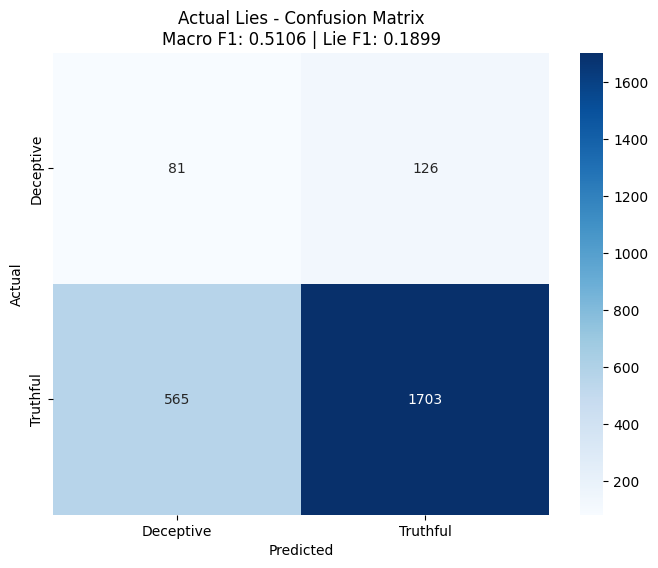

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Suspected Lies - Precision: 0.9393
Suspected Lies - Recall: 0.7437
Suspected Lies - F1 Score: 0.8302
Suspected Lies - Macro F1: 0.4817
Suspected Lies - Lie F1: 0.1332


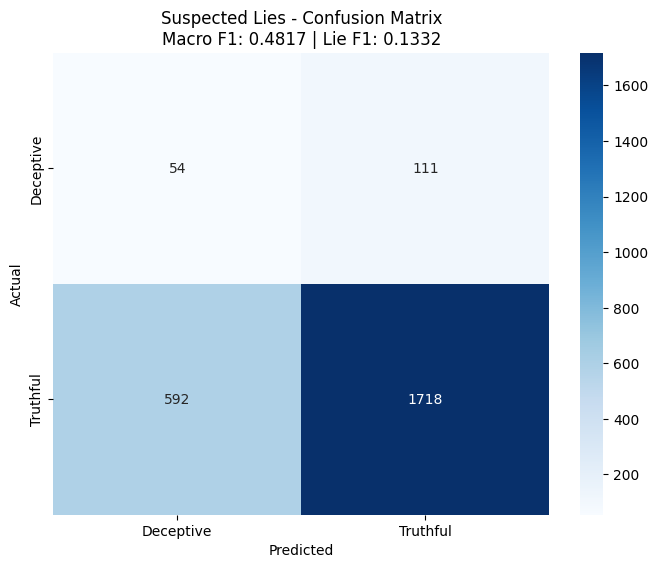

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, LayerNormalization, GlobalAveragePooling1D, MultiHeadAttention
from tensorflow.keras.models import Model

def create_transformer_model(max_vocab_size, embedding_dim, transformer_units, max_sequence_length):
    inputs = Input(shape=(max_sequence_length,))
    embedding = Embedding(input_dim=max_vocab_size, output_dim=embedding_dim)(inputs)
    embedding = LayerNormalization(epsilon=1e-6)(embedding)
    
    # Transformer block
    attention_output = MultiHeadAttention(
        num_heads=transformer_units, 
        key_dim=embedding_dim
    )(embedding, embedding)
    
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)
    pooled_output = GlobalAveragePooling1D()(attention_output)
    
    outputs = Dense(1, activation='sigmoid')(pooled_output)
    model = Model(inputs=inputs, outputs=outputs)
    return model

transformer_units = 64  # Number of units for the transformer block
model_transformer = create_transformer_model(max_vocab_size, embedding_dim, transformer_units, max_sequence_length)
model_transformer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score_metric])

model_transformer.summary()


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    '/kaggle/working/tranformer_epoch_{epoch:02d}.keras',
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=False,
    mode='auto'
)
best_model_checkpoint = ModelCheckpoint(
    '/kaggle/working/best_transformer.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='auto'
)

# Train the model on balanced dataset
history_balanced = model_transformer.fit(
    balanced_train_padded, 
    np.array(balanced_train_labels, dtype=np.float32),
    batch_size=32,
    epochs=10,
    validation_data=(val_padded, np.array(val_labels, dtype=np.float32)),
    callbacks=[early_stopping, model_checkpoint, best_model_checkpoint]
)

# Fine-tune on complete dataset
best_model = load_model('/kaggle/working/best_transformer.keras', custom_objects={'f1_score_metric': f1_score_metric})
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score_metric])

# Evaluate on test data
test_loss, test_accuracy, test_f1 = best_model.evaluate(test_padded, np.array(test_labels, dtype=np.float32))
print(f'\nTest accuracy: {test_accuracy:.4f}')
print(f'Test F1 score: {test_f1:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Generate predictions
test_predictions = best_model.predict(test_padded)
test_predictions_binary = (test_predictions > 0.5).astype(int)

# Calculate evaluation metrics for actual lies
precision_actual = precision_score(test_labels, test_predictions_binary)
recall_actual = recall_score(test_labels, test_predictions_binary)
f1_actual = f1_score(test_labels, test_predictions_binary)
f1_macro_actual = f1_score(test_labels, test_predictions_binary, average='macro')
f1_lie_actual = f1_score(test_labels, test_predictions_binary, average='binary', pos_label=0)  # Lie F1 (deceptive class)

print(f'\nActual Lies - Precision: {precision_actual:.4f}')
print(f'Actual Lies - Recall: {recall_actual:.4f}')
print(f'Actual Lies - F1 Score: {f1_actual:.4f}')
print(f'Actual Lies - Macro F1: {f1_macro_actual:.4f}')
print(f'Actual Lies - Lie F1: {f1_lie_actual:.4f}')

# Create confusion matrix for actual lies
conf_matrix_actual = confusion_matrix(test_labels, test_predictions_binary)

# Plot confusion matrix for actual lies
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_actual, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Deceptive', 'Truthful'], 
            yticklabels=['Deceptive', 'Truthful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Actual Lies - Confusion Matrix\nMacro F1: {f1_macro_actual:.4f} | Lie F1: {f1_lie_actual:.4f}')
plt.show()

# Evaluate for suspected lies (using receiver_labels)
def preprocess_suspected_data(data):
    texts = []
    labels = []
    for sample in data:
        messages = sample['messages']
        receiver_labels = sample['receiver_labels']
        
        for i in range(len(messages)):
            if receiver_labels[i] != "NOANNOTATION":
                texts.append(messages[i])
                labels.append(0 if receiver_labels[i] == False else 1)  # 0 for deceptive, 1 for truthful
    return texts, labels

# Process test data for suspected lies
suspected_texts, suspected_labels = preprocess_suspected_data(test_data)

# Clean and preprocess suspected data
suspected_texts_clean = [clean_text(text) for text in suspected_texts]
suspected_sequences = tokenizer.texts_to_sequences(suspected_texts_clean)
suspected_padded = pad_sequences(suspected_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Generate predictions for suspected lies
suspected_predictions = best_model.predict(suspected_padded)
suspected_predictions_binary = (suspected_predictions > 0.5).astype(int)

# Calculate evaluation metrics for suspected lies
precision_suspected = precision_score(suspected_labels, suspected_predictions_binary)
recall_suspected = recall_score(suspected_labels, suspected_predictions_binary)
f1_suspected = f1_score(suspected_labels, suspected_predictions_binary)
f1_macro_suspected = f1_score(suspected_labels, suspected_predictions_binary, average='macro')
f1_lie_suspected = f1_score(suspected_labels, suspected_predictions_binary, average='binary', pos_label=0)  # Lie F1 (deceptive class)

print(f'\nSuspected Lies - Precision: {precision_suspected:.4f}')
print(f'Suspected Lies - Recall: {recall_suspected:.4f}')
print(f'Suspected Lies - F1 Score: {f1_suspected:.4f}')
print(f'Suspected Lies - Macro F1: {f1_macro_suspected:.4f}')
print(f'Suspected Lies - Lie F1: {f1_lie_suspected:.4f}')

# Create confusion matrix for suspected lies
conf_matrix_suspected = confusion_matrix(suspected_labels, suspected_predictions_binary)

# Plot confusion matrix for suspected lies
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_suspected, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Deceptive', 'Truthful'], 
            yticklabels=['Deceptive', 'Truthful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Suspected Lies - Confusion Matrix\nMacro F1: {f1_macro_suspected:.4f} | Lie F1: {f1_lie_suspected:.4f}')
plt.show()